## Bike Sharing Assignment

### Problem Statement
A US bike-sharing company has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes
- How well those variables describe the bike demands

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading and Understanding the Data

In [2]:
# Reading the data
bikedf = pd.read_csv('day.csv')

In [3]:
# Inspecting the various aspects of the bike dataset

In [4]:
# checking the head of the dataset
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking shape of the dataset
bikedf.shape

(730, 16)

In [6]:
# Checking the descriptive information
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking summary statistics for numerical columns
bikedf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking for null values
bikedf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Findings:
- Dataset as 730 rows with 16 columns
- We have some unwanted variables which we can safely drop
- From the above summary looks like we have some categorical variables though its datatype from info is integer
- Categorical Variables => season, mnth, weekday, weathersit (yr, holiday, workingday)
- No null values found

In [9]:
# Taking a copy of original dataframe before applying cleaning
df = bikedf.copy()
df.shape

(730, 16)

### Dropping following unwanted variables
1. instant - This is a index column
2. dteday - This is a date column but we already have other columns which gives same data
3. casual & registered - This columns categorized the users but we are interested in total number of users which is cnt

In [10]:
df = df.drop(['instant','dteday','casual','registered'], axis=1)
df.shape

(730, 12)

In [11]:
# Mapping season column
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Mapping month column
df['mnth'] = df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Mapping weekday column
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Mapping weathersit column
df['weathersit'] = df['weathersit'].map({1:'clear',2:'misty',3:'light_rain_or_snow',4:'heavy_rain_or_snow'})

df.shape

(730, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Visualizing the data

<Figure size 720x432 with 0 Axes>

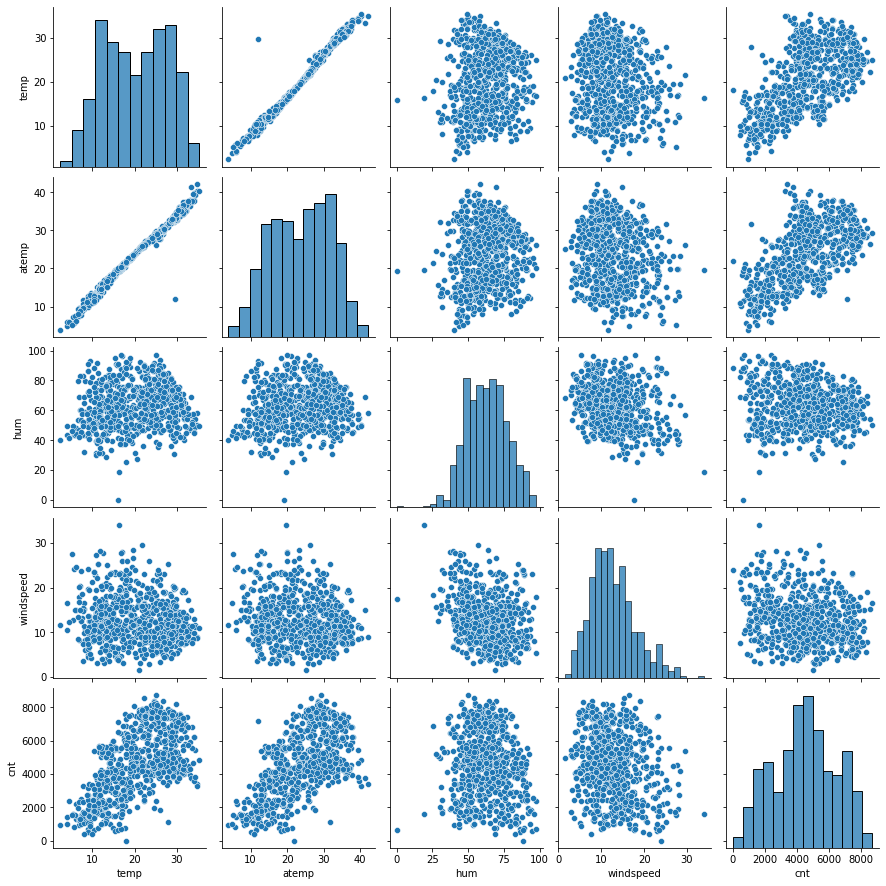

In [13]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df[['temp', 'atemp', 'hum','windspeed','cnt']])
plt.show()

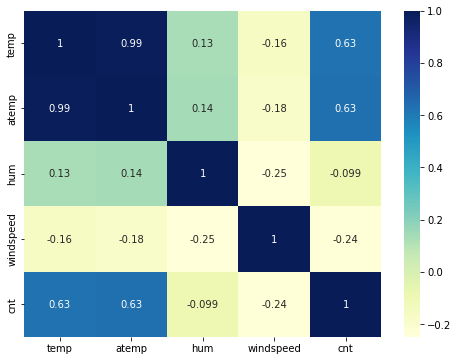

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp', 'atemp', 'hum','windspeed','cnt']].corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Findings:
- From the above plots we can see that there is a linear relation between temp (temperature), atemp (feeling temperature) and cnt (total rental bikes)
- There is a high correlation between temp (temperature) and atemp (feeling temperature), so we'll drop one column based on p-value later

In [15]:
df = df.drop(columns=['atemp'])
df.shape

(730, 11)

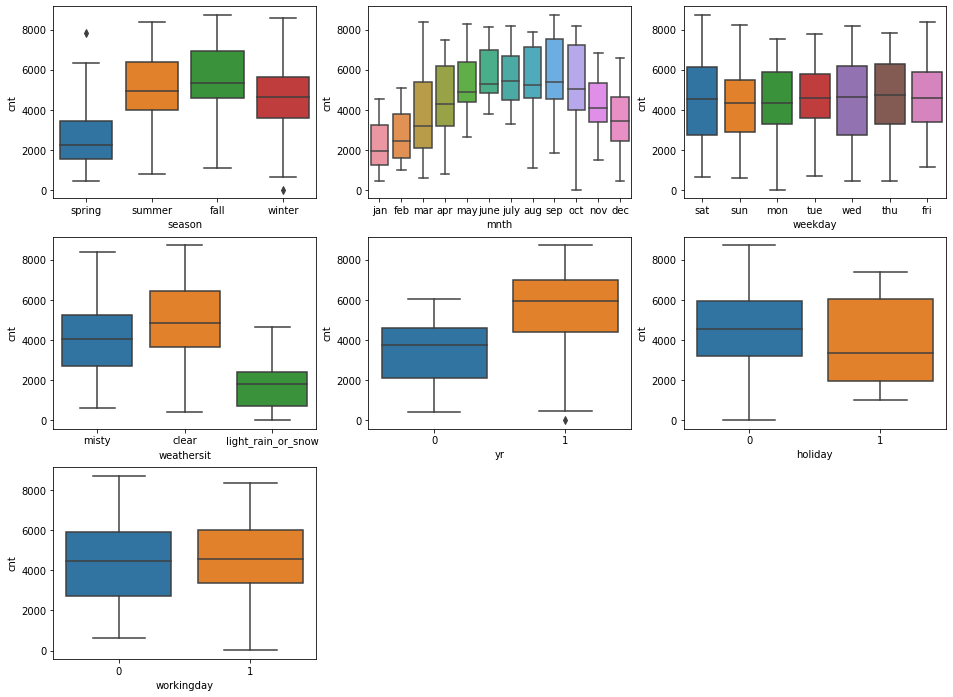

In [16]:
# checking categorical columns against target column

plt.figure(figsize=(16, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

#### Findings:
- During the fall season the bookings are increased
- Bookings are good between the months of May and October
- Bookings showed increasing trend until 3rd quarter of the year and dropped in the last quarter
- During clear weather we see more bookings
- The weekday did not impact the average bookings
- Bookings increased drastically in 2019 compared to 2018
- Bookings are low during holidays
- Working day and non-working day has no impact on the bookings

### Data Preparation

In [17]:
# Dummy variable for season, mnth, weekday, weathersit variables

df_season = pd.get_dummies(df['season'], drop_first=True)
df_month = pd.get_dummies(df['mnth'], drop_first=True)
df_weekday = pd.get_dummies(df['weekday'], drop_first=True)
df_weathersit = pd.get_dummies(df['weathersit'], drop_first=True)

df = pd.concat([df, df_season, df_month, df_weekday, df_weathersit], axis=1)
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain_or_snow,misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df.shape

(730, 29)

### Splitting the data - Training and Testing Sets

In [19]:
# Split dataset into train and test

df_train, df_test = train_test_split(df, train_size=0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features

In [20]:
# scaling features using MinMaxScaler
# min-max scaling (normalization) (x - xmin) / (xmax -xmin)

scaler = MinMaxScaler()
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain_or_snow,misty
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain_or_snow,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


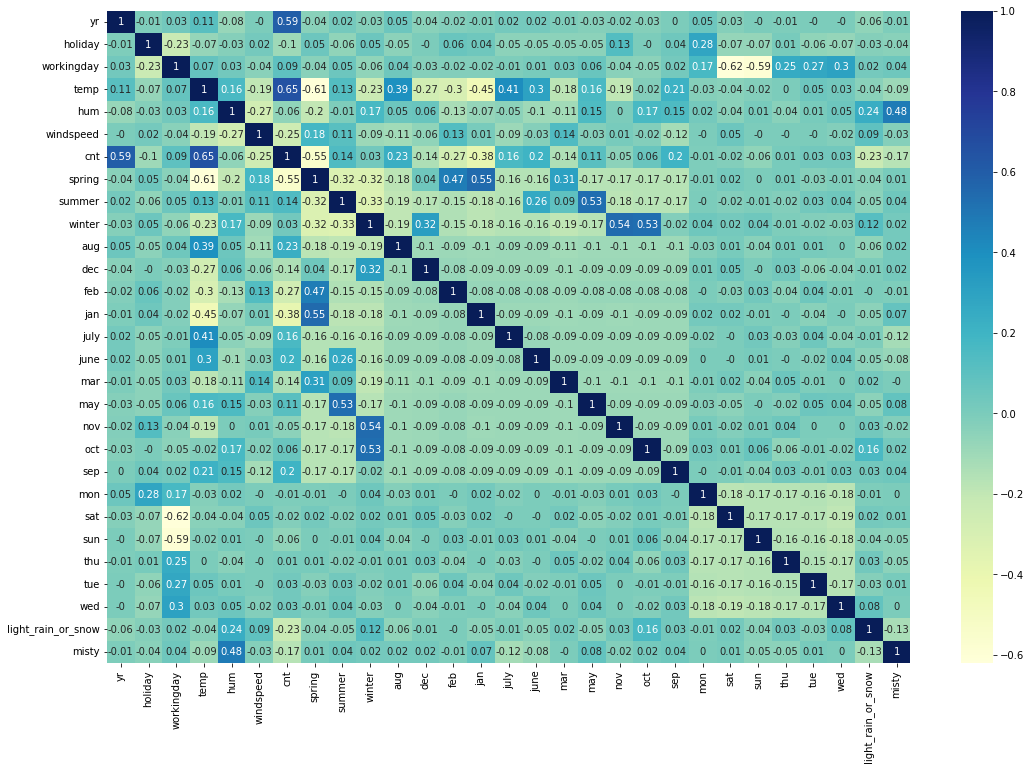

In [22]:
# we will refer this plot while building our model
plt.figure(figsize=(18,12))
sns.heatmap(round(df_train.corr(),2), annot=True, cmap="YlGnBu")
plt.show()

### Building our model

In [23]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

### We'll use RFE (Recursive Feature Elimination) method for feature selection

In [24]:
# Importing RFE
from sklearn.feature_selection import RFE

In [25]:
# Running RFE with the output number of the variable equal to say 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('light_rain_or_snow', True, 1),
 ('misty', True, 1)]

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'jan', 'sep', 'sat', 'sun', 'light_rain_or_snow', 'misty'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['summer', 'aug', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [29]:
# Calculate the VIFs for the model
def compute_vif(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1 - Building model using statsmodel, for the detailed statistics

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)

In [32]:
# Running the linear model
lm = sm.OLS(y_train, X_train_sm).fit()

In [33]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.36e-187
Time:                        16:46:19   Log-Likelihood:                 504.03
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     496   BIC:                            -920.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2583      0

#### Findings:
- `holiday` is insignificant in presence of other variables
- we'll drop the `holiday` feature

### Model 2 - Rebuilding the model without `holiday`

In [34]:
col = col.drop(['holiday'])

# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col]
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train, X_train_sm).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.36e-187
Time:                        16:47:04   Log-Likelihood:                 504.03
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     496   BIC:                            -920.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2563      0

In [35]:
# Calculate the VIFs for the new model
compute_vif(X_train_new)

,Features,VIF
3,hum,28.99
1,workingday,17.01
2,temp,15.56
9,sat,4.59
4,windspeed,4.51
10,sun,4.47
5,spring,3.10
12,misty,2.28
6,winter,2.17
0,yr,2.08


#### Findings:
- p-values of all feature variables are good
- From the VIF table humidity feature indicates high correlation and is cause for concern
- So we drop humidity

### Model 3 - Rebuilding the model without `humidity`

In [36]:
col = col.drop(['hum'])

# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col]
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train, X_train_sm).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.07e-185
Time:                        16:48:04   Log-Likelihood:                 498.47
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     497   BIC:                            -915.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1879      0

#### Findings:
- `sun` (weekday-sun) is insignificant in presence of other variables
- we'll drop the `sun` (weekday-sun) feature

### Model 4 - Rebuilding the model without `sun`

In [37]:
col = col.drop(['sun'])

# Creating X_test dataframe with RFE selected variables
X_train_new = X_train[col]
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train, X_train_sm).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.2
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.41e-186
Time:                        16:48:19   Log-Likelihood:                 496.57
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     498   BIC:                            -918.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2342      0

In [38]:
# Calculate the VIFs for the new model
compute_vif(X_train_new)

,Features,VIF
2,temp,5.53
1,workingday,4.47
3,windspeed,4.08
4,spring,2.35
0,yr,2.06
8,sat,1.80
6,jan,1.61
10,misty,1.54
5,winter,1.42
7,sep,1.15


#### Findings:
- p-values for all predictors are significant
- VIF states very low multicolinearity between the predictors
- Probabilty of F-Statistics is equal to ~0, so overall the model 4 is significant

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [41]:
y_train_pred = lm.predict(X_train_sm)

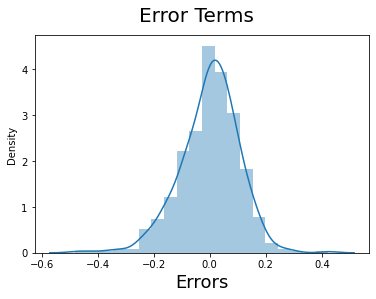

In [42]:
# Residual Normality
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### Findings:
- Error terms follow normal distribution

In [42]:
# Multicorrelation
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.53
1,workingday,4.47
3,windspeed,4.08
4,spring,2.35
0,yr,2.06
8,sat,1.80
6,jan,1.61
10,misty,1.54
5,winter,1.42
7,sep,1.15


#### Findings:
- From VIF all features are low so we can say no multicolinearity

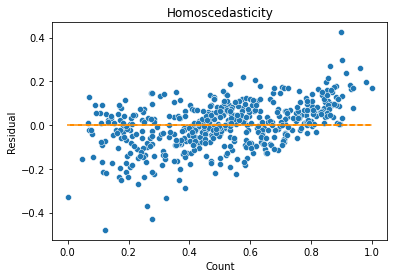

In [44]:
# Homoscedasticity - Constant variance
residuals = y_train - y_train_pred
sns.scatterplot(y_train, residuals)
#plt.axhline(0, color='r')
plt.plot(y_train,(y_train - y_train), color='darkorange', linestyle='dashed')
plt.title("Homoscedasticity")
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [45]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 3.953264730822126e-16


#### Findings:
- No visible pattern observed from above residuals plot
- The mean of residuals is almost equal to zero, which is good

#### Independence of residuals
- Durbin-Watson value of final model 4 is 2.028, which signifies there is no autocorrelation.

### Making Predictions


#### Applying the scaling on the test sets

In [46]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [47]:
y_test = df_test.pop('cnt')
X_test = df_test

In [48]:
X_train_new.columns

Index(['yr', 'workingday', 'windspeed', 'spring', 'winter', 'jan', 'sep',
       'sat', 'light_rain_or_snow', 'misty'],
      dtype='object')

In [49]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [50]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

### Model Evaluation

#### Let's now plot the graph for actual versus predicted values

Text(0, 0.5, 'y_test_pred')

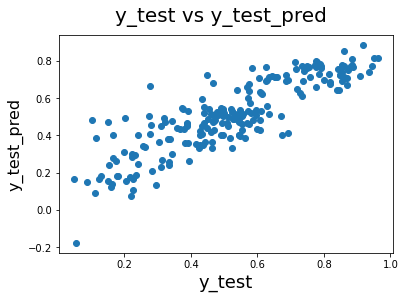

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)    # Plot heading 
plt.xlabel('y_test', fontsize=18)                     # X-label
plt.ylabel('y_test_pred', fontsize=16)                # Y-label

In [52]:
r2_score = r2_score(y_true=y_test, y_pred=y_test_pred)
print(r2_score)

0.73721654468791


#### Findings:
- r2_score is close to the r2_score we got from final model

### Conclusion:

From the final model, we can conclude below insights

1. Top 3 features which influence the bike bookings are 
    - Temperature (temp)
    - Weather (Weathersit = light rain or snow)
    - Year
2. A unit increase in temperature, increases the bike bookings by 0.5155 units
3. A unit increase in weathersit (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) decreases the bookings by 0.2863 units
4. A unit increase in year, increases the bike bookings by 0.2348 units
5. Equation for Bike booking cnt can be expressed:
cnt = 0.2342 + (0.3884*temp) - (0.2932*light_rain_or_snow) + (0.2366*yr) - (0.1472*windspeed) - (0.1067*spring) - (0.0777*misty) + (0.0662*sep) + (0.0662*sat) + (0.0556*workingday) - (0.0504*jan) + (0.0416*winter)